In [2]:
import sqlite3 as sql
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go

In [3]:
# load data from Global Food Security Index 2015-2019
df = pd.read_csv('GFSI_2016.csv', encoding='latin-1')

conn = sql.connect("Food_Happiness_Project.db")

# drop data into database
df.to_sql("GFSI 2015", conn)

conn.commit()

In [ ]:
# load data from World Happiness Report 2015-2019
df = pd.read_csv('2018.csv')



conn = sql.connect("Food_Happiness_Project.db")

# drop data into database
df.to_sql("WHP 2018", conn)

conn.commit()



In [34]:
#Print all table names
conn = sql.connect("Food_Happiness_Project.db")
c = conn.cursor()

c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())
conn.close()

[('Country and Region',), ('WHP 2015',), ('WHP 2016',), ('WHP 2017',), ('WHP 2018',), ('WHP 2019',), ('GFSI 2015',), ('GFSI 2016',), ('GFSI 2017',), ('GFSI 2018',), ('GFSI 2019',)]


In [15]:
#Attempt a pull
conn = sql.connect("Food_Happiness_Project.db")
c = conn.cursor()
c.execute("SELECT * FROM 'Country and Region'")
print(c.fetchone())
conn.close()

(0, 'Afghanistan', 'AF', 'AFG', 4, 'ISO 3166-2:AF', 'Asia', 'Southern Asia', None, 142.0, 34.0, None)


In [ ]:
#Delete whp 2018 for cleaning purposes (reuploaded after)
conn = sql.connect("Food_Happiness_Project.db")
c = conn.cursor()
c.execute("DROP TABLE 'WHP 2018'")
conn.close

In [ ]:
#GFSI vs. WHP Analysis
conn = sql.connect("Food_Happiness_Project.db")
df1 = pd.read_sql("SELECT * FROM 'GFSI 2019'", conn)
df2 = pd.read_sql("SELECT * FROM 'WHP 2019'", conn)
df3 = pd.read_sql("SELECT * FROM 'Country and Region'", conn)
conn.close()
print(df2)

In [ ]:
#Set dataframes for analysis
conn = sql.connect("Food_Happiness_Project.db")
c = conn.cursor()
df2019 = pd.read_sql('''SELECT *
                FROM 'GFSI 2019' AS Combined_DF
                JOIN 'WHP 2019' ON 'Combined_DF'.Overall = 'WHP 2019'.Country
                JOIN 'Country and Region' ON 'Combined_DF'.Overall = 'Country and Region'.name
                ''', conn)
df2018 = pd.read_sql('''SELECT *
                FROM 'GFSI 2018' AS Combined_DF1
                JOIN 'WHP 2018' ON 'Combined_DF1'.Overall = 'WHP 2018'.Country
                ''', conn)
df2017 = pd.read_sql('''SELECT *
                FROM 'GFSI 2017' AS Combined_DF2
                JOIN 'WHP 2017' ON 'Combined_DF2'.Overall = 'WHP 2017'.Country
                ''', conn)
df2016 = pd.read_sql('''SELECT *
                FROM 'GFSI 2016' AS Combined_DF3
                JOIN 'WHP 2016' ON 'Combined_DF3'.Overall = 'WHP 2016'.Country
                ''', conn)
df2015 = pd.read_sql('''SELECT *
                FROM 'GFSI 2015' AS Combined_DF4
                JOIN 'WHP 2015' ON 'Combined_DF4'.Overall = 'WHP 2015'.Country
                ''', conn)
print(df2019)
conn.commit()

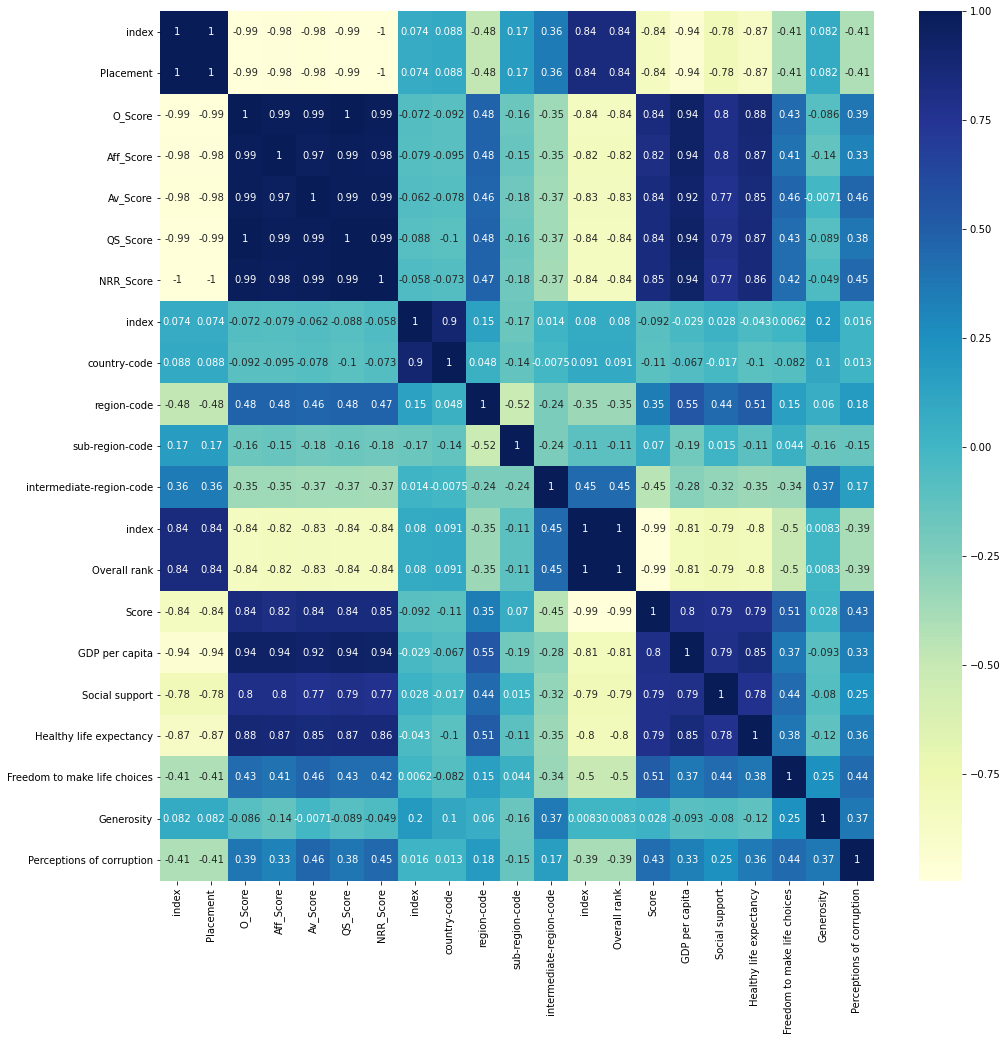

In [104]:
import seaborn as sns

df = df2019.drop(['O_Arrow', 'Aff_Arrow', 'Av_Arrow', 'QS_Arrow'], axis=1)

#Correlation matrix of df above with the Overall column setting the index (join of GFSI and WHP 2019)
correlation_mat = df.corr()
plt.figure(figsize=(16, 16))

sns.heatmap(correlation_mat, cmap = "YlGnBu", annot = True)

plt.show()

In [81]:
#Declare Correlation Matrices
corr2019 = df2019.corr()
corr2018 = df2018.corr()
corr2017 = df2017.corr()
corr2016 = df2016.corr()
corr2015 = df2015.corr()



     index  Placement         Overall  O_Score  O_Arrow         Affordability  \
0        0          1       Singapore     85.9      0.9             Singapore   
1        1          2         Ireland     85.5     -1.2                 Qatar   
2        2          3  United Kingdom     85.0      0.6               Ireland   
3        3          4   United States     85.0      0.1  United Arab Emirates   
4        4          5     Netherlands     84.7      1.6         United States   
..     ...        ...             ...      ...      ...                   ...   
105    107        108            Chad     31.5      2.2          Sierra Leone   
106    108        109    Sierra Leone     29.2      0.0                Zambia   
107    109        110           Yemen     28.5      1.4                Malawi   
108    110        111      Madagascar     27.0      0.2               Burundi   
109    112        113         Burundi     23.9     -1.4            Madagascar   

     Aff_Score  Aff_Arrow  

In [117]:
#Create cloropleth of WHR score 
import plotly.express as px
fig = px.choropleth(df2019, locations="alpha-3",
                    color="Score", # lifeExp is a column of gapminder
                    hover_name="Country",
                    title="World Happiness Score 2019",# column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [109]:
#Create bubble chart to illustrate trends
import plotly.express as px
fig = px.scatter(df2019, x="Av_Score", y="Freedom to make life choices", size="GDP per capita", color="region",
                 labels={
                     "Av_Score": "Availability (0-100)",
                     "Freedom to make life choices": "Freedom to Make Life Choices (Higher is better)",
                     "region": "Region"
                 },
                title="Availability of Food in Supply vs Freedom to Make Life Choices 2019",
                 hover_name="name")
fig.show()




In [121]:
#Check P-values for graphs
import scipy.stats
r, p = scipy.stats.pearsonr(df2019['QS_Score'], df2019['Healthy life expectancy'])
print(r)
print(p)

0.8391082066796018
8.575373241959208e-30
